Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading Data Set

In [ ]:
#Reading data
df=pd.read_csv('/content/neo.csv')

Data Overview

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [ ]:
df.shape

(90836, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


In [ ]:
#missing values check
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
#Checking duplicates
df.duplicated().sum()

0

In [ ]:
#checking Unique values
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


In [ ]:
print(df["orbiting_body"].value_counts())
print(df["sentry_object"].value_counts())

Earth    90836
Name: orbiting_body, dtype: int64
False    90836
Name: sentry_object, dtype: int64


By the above result we see that the two columns 'orbiting_body' & 'sentry_object' have only one value (Earth & False). So, these two columns are of no use. We can delete these two columns from the dataframe.

In [ ]:
#Dropping columns 'orbiting_body' & 'sentry_object' & id and name
df = df.drop(['id','name','orbiting_body','sentry_object'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


OUTLIER ANALYSIS

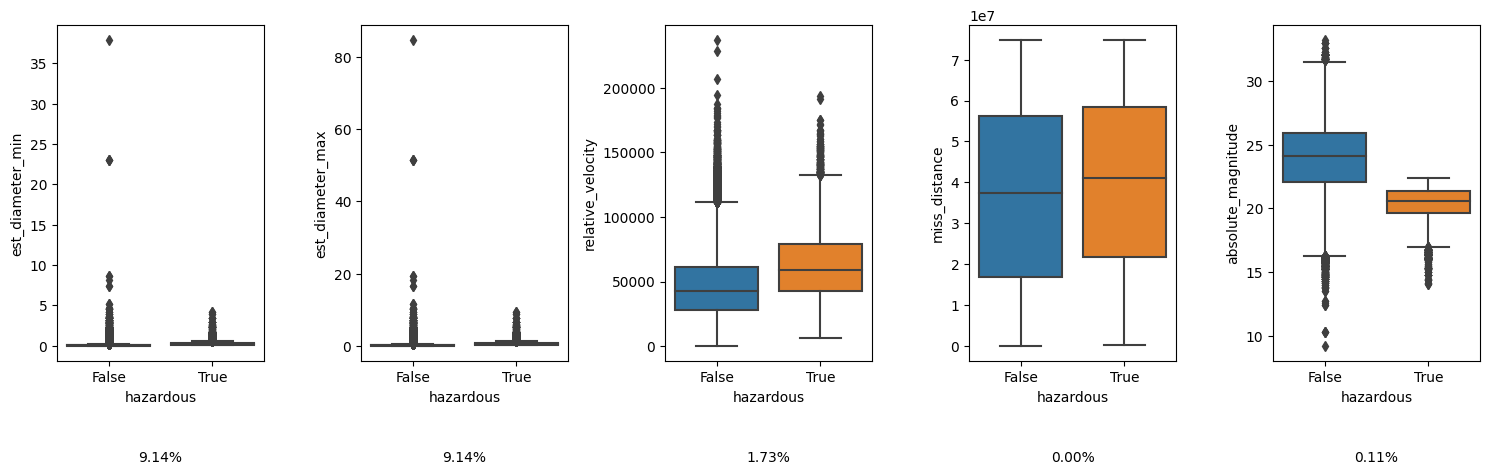

Percentage of outliers in est_diameter_min: 9.14%
Percentage of outliers in est_diameter_max: 9.14%
Percentage of outliers in relative_velocity: 1.73%
Percentage of outliers in miss_distance: 0.00%
Percentage of outliers in absolute_magnitude: 0.11%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of numerical columns
nums = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Set up the matplotlib figure
rows = 1
cols = 5
counter = 1
plt.rcParams['figure.figsize'] = [15, 5]

# Dictionary to store percentage of outliers for each column
outlier_percentages = {}

for i in nums:
    plt.subplot(rows, cols, counter)

    # Create a box plot
    sns.boxplot(x='hazardous', y=i, data=df)

    # Identify outliers
    upper_outliers = df[df[i] > df[i].quantile(0.75) + 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25))]
    lower_outliers = df[df[i] < df[i].quantile(0.25) - 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25))]

    # Calculate the percentage of outliers
    total_data_points = len(df)
    total_outliers = len(upper_outliers) + len(lower_outliers)
    percentage_outliers = (total_outliers / total_data_points) * 100
    outlier_percentages[i] = percentage_outliers

    # Display the percentage of outliers on the plot
    plt.text(0.5, -0.3, f'{percentage_outliers:.2f}%', transform=plt.gca().transAxes, ha='center')

    counter += 1

plt.tight_layout()
plt.show()

# Display the percentage of outliers for each column
for column, percentage in outlier_percentages.items():
    print(f'Percentage of outliers in {column}: {percentage:.2f}%')


**Visualizations**

<Axes: >

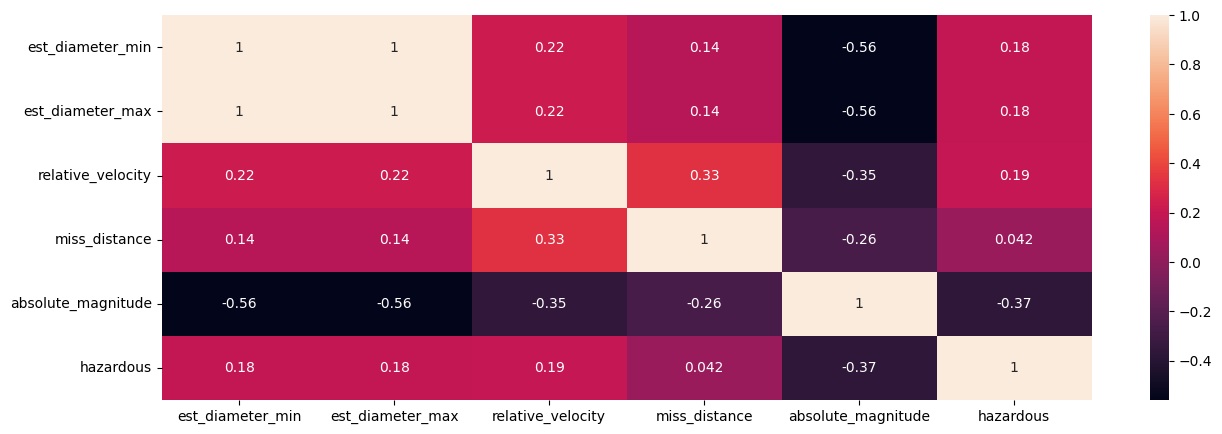

In [ ]:
#correlation heat map
plt.figure()
sns.heatmap(df.corr(),annot=True)

<ipython-input-49-00ea2913c86d>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)
<ipython-input-49-00ea2913c86d>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)
<ipython-input-49-00ea2913c86d>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)
<ipython-input-49-00ea2913c86d>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)
<ipython-input-49-00ea2913c86d>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = df)


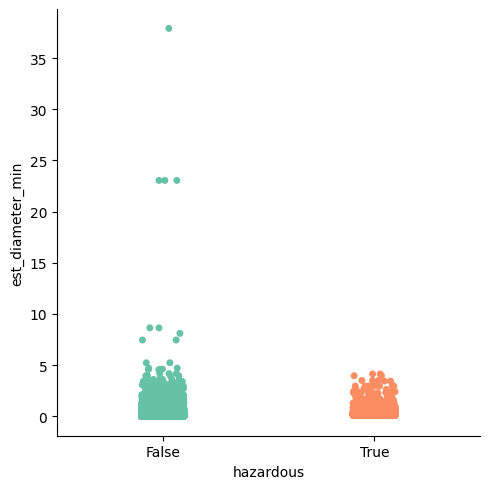

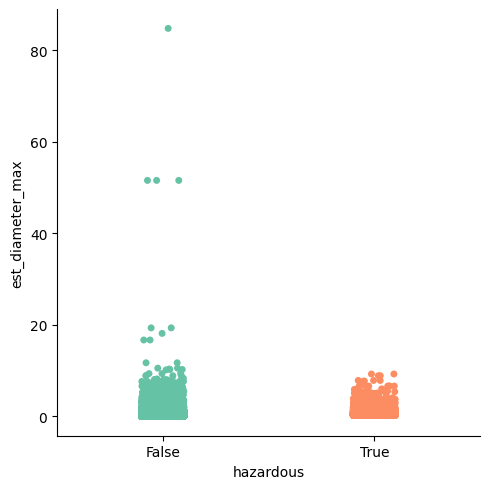

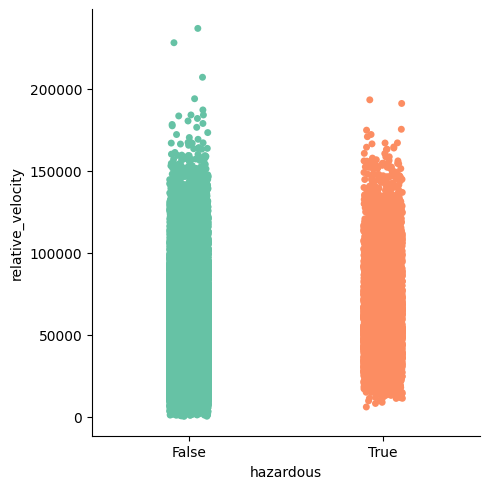

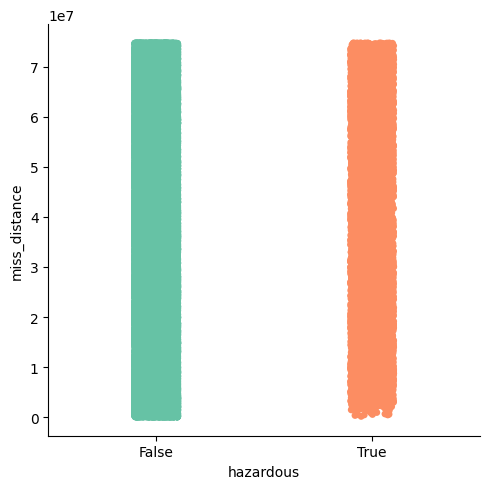

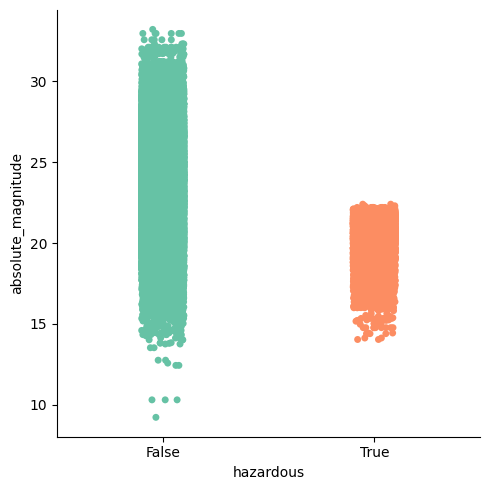

In [ ]:
#relationship of every varaible with target
sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)
sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = df)

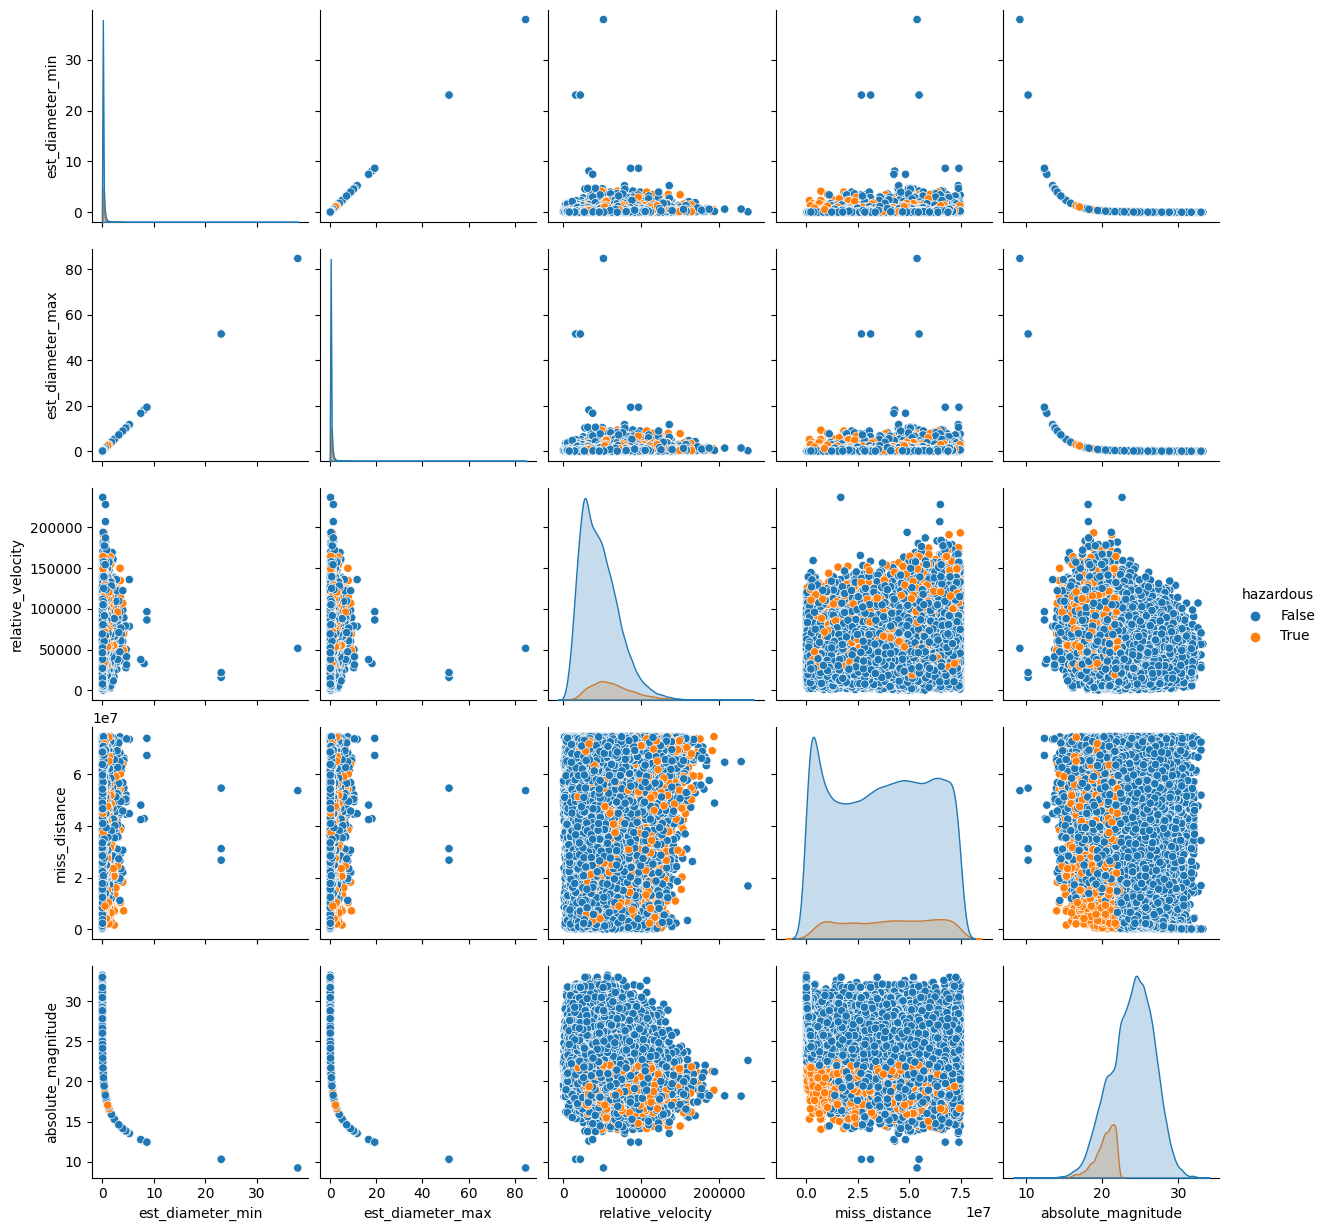

In [ ]:
sns.pairplot(df, hue = "hazardous")

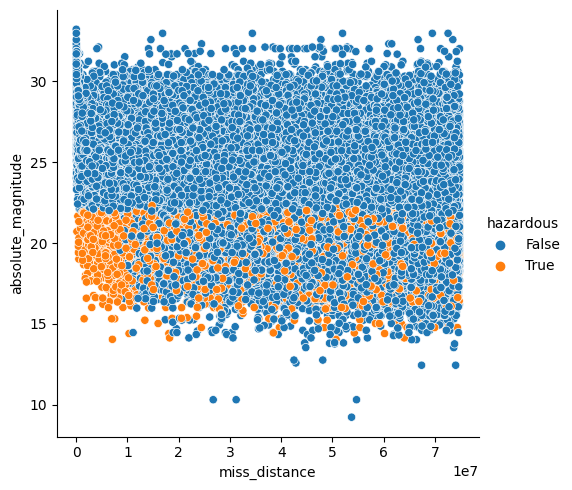

In [ ]:
sns.relplot(x='miss_distance', y = 'absolute_magnitude', hue = "hazardous", data = df)

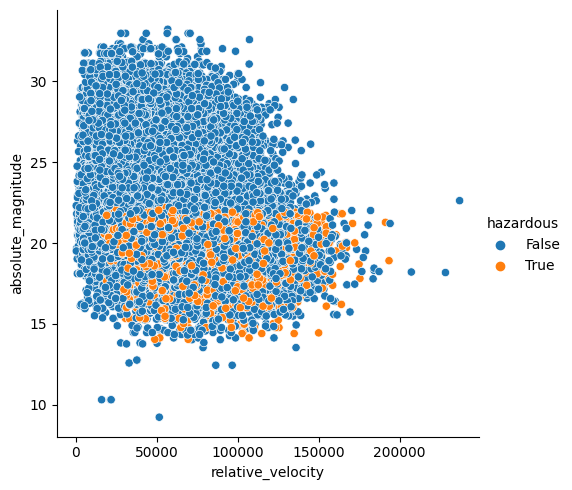

In [ ]:
sns.relplot(x='relative_velocity', y = 'absolute_magnitude', hue = "hazardous", data = df)

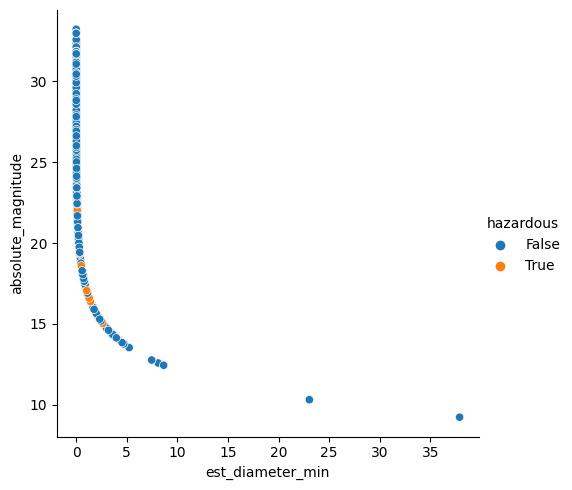

In [ ]:
sns.relplot(x='est_diameter_min', y = 'absolute_magnitude', hue = "hazardous", data = df)

In [ ]:
#we need to do scaling for the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale=['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
# Display the scaled DataFrame
print(df)

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              3.587284          3.587284          -1.363913       0.795153   
1              0.463529          0.463529           1.009040       1.090357   
2              1.991887          1.991887           2.616983       0.569624   
3             -0.103601         -0.103601          -0.921301      -0.520384   
4              0.427378          0.427378          -0.210697       0.412001   
...                 ...               ...                ...            ...   
90831         -0.337852         -0.337852           0.158619      -1.108010   
90832         -0.370713         -0.370713          -0.077187       0.771954   
90833         -0.319842         -0.319842          -1.601228      -0.387697   
90834         -0.402370         -0.402370           0.835492       1.414890   
90835         -0.293359         -0.293359          -0.831943       1.015823   

       absolute_magnitude  hazardous  
0           

Data Prep for Modelling

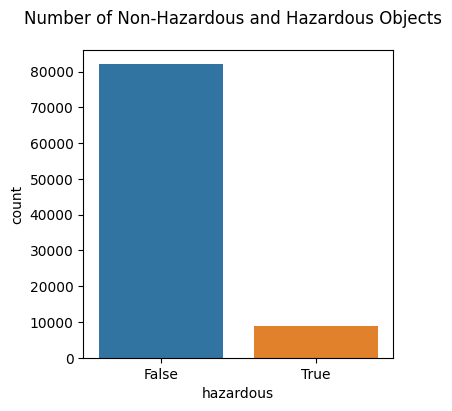

In [ ]:
sns.countplot(x='hazardous',data=df)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

In [ ]:
#we need to balance the unbalanced data set above


In [ ]:
#Dividing data source to input/output variables for Creating Training & Testing Data set
x = df.drop(['hazardous'],axis=1)
y = df.drop(['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude'],axis=1)
print(x)
print(y)

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              3.587284          3.587284          -1.363913       0.795153   
1              0.463529          0.463529           1.009040       1.090357   
2              1.991887          1.991887           2.616983       0.569624   
3             -0.103601         -0.103601          -0.921301      -0.520384   
4              0.427378          0.427378          -0.210697       0.412001   
...                 ...               ...                ...            ...   
90831         -0.337852         -0.337852           0.158619      -1.108010   
90832         -0.370713         -0.370713          -0.077187       0.771954   
90833         -0.319842         -0.319842          -1.601228      -0.387697   
90834         -0.402370         -0.402370           0.835492       1.414890   
90835         -0.293359         -0.293359          -0.831943       1.015823   

       absolute_magnitude  
0               -2.3486

In [ ]:
from imblearn.over_sampling import RandomOverSampler

random_over_sampler = RandomOverSampler()
x, y = random_over_sampler.fit_resample(x,y)
print(x)
print(y)

        est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0               3.587284          3.587284          -1.363913       0.795153   
1               0.463529          0.463529           1.009040       1.090357   
2               1.991887          1.991887           2.616983       0.569624   
3              -0.103601         -0.103601          -0.921301      -0.520384   
4               0.427378          0.427378          -0.210697       0.412001   
...                  ...               ...                ...            ...   
163987          0.945872          0.945872           0.846667       1.210243   
163988          0.218160          0.218160          -0.889861      -0.970105   
163989         -0.045305         -0.045305           3.814121       1.357866   
163990          0.423453          0.423453           0.900127      -1.335265   
163991         -0.055704         -0.055704           0.227029      -0.770762   

        absolute_magnitude  
0         

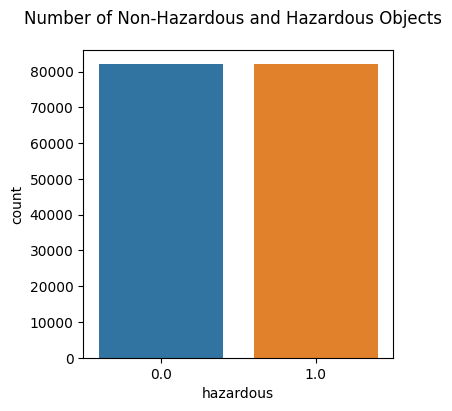

In [ ]:
#After Oversampling Target Variable
df_new=pd.concat([x,y])
sns.countplot(x='hazardous',data=df_new)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

In [ ]:
#Label encoding output variable
from sklearn.preprocessing import LabelEncoder

label_encoder_hazardous = LabelEncoder()
df['hazardous'] = label_encoder_hazardous.fit_transform(df['hazardous'])
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,0
1,0.463529,0.463529,1.009040,1.090357,-1.218735,1
2,1.991887,1.991887,2.616983,0.569624,-1.968544,0
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,0
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,1


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.shape , y_train.shape

((114794, 5), (114794, 1))

In [ ]:
x_test.shape , y_test.shape

((49198, 5), (49198, 1))

MODEL BUILDING

1. Logistic Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_loreg = LogisticRegression(random_state=1)

# Train the model on the training set
model_loreg.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model_loreg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("FOR LOGISTIC REGRESSION")
print(f'\nAccuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FOR LOGISTIC REGRESSION

Accuracy: 0.8508

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84     24379
           1       0.81      0.93      0.86     24819

    accuracy                           0.85     49198
   macro avg       0.86      0.85      0.85     49198
weighted avg       0.86      0.85      0.85     49198



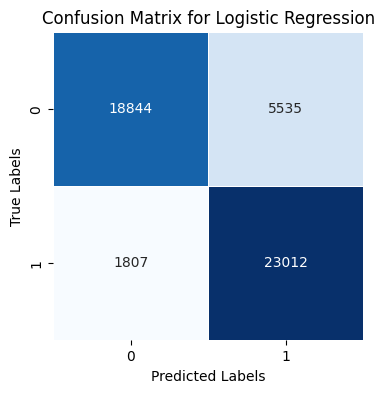

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a colored confusion matrix using seaborn
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

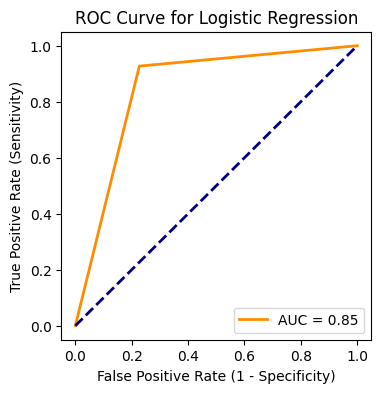

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

2. KNN

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {'n_neighbors': range(1, 21)}  # trying k from 1 to 20

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Use the best hyperparameters to create the final model
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Train the final model on the training set
final_knn_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = final_knn_model.predict(x_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("FOR KNN")
print(f'Best k: {best_k}')
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_rep)

FOR KNN
Best k: 1
Accuracy: 0.9614

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     24379
           1       0.93      1.00      0.96     24819

    accuracy                           0.96     49198
   macro avg       0.96      0.96      0.96     49198
weighted avg       0.96      0.96      0.96     49198



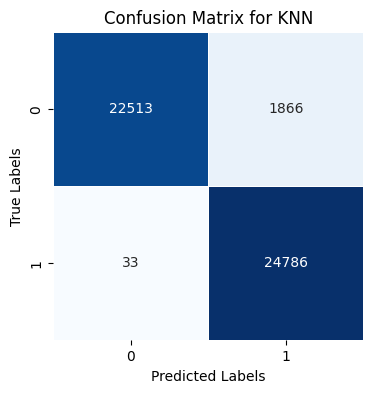

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a colored confusion matrix using seaborn
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

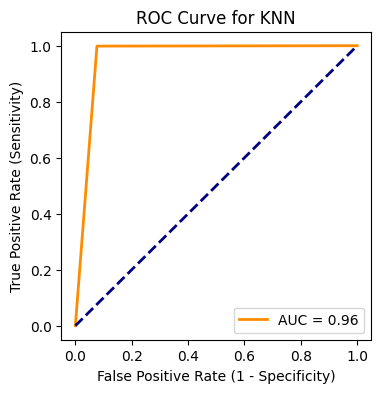

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)
random_search.fit(x_train, y_train)
# Get the best hyperparameters

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the best parameters and create the final model
best_params = random_search.best_params_
best_rf_model = RandomForestClassifier(**best_params)

# Train the final model
best_rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("FOR RANDOM FOREST")
print(f"\nBest hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print('\nClassification Report:')
print(classification_rep)

FOR RANDOM FOREST

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.9630269523151348

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     24379
           1       0.93      1.00      0.96     24819

    accuracy                           0.96     49198
   macro avg       0.96      0.96      0.96     49198
weighted avg       0.96      0.96      0.96     49198



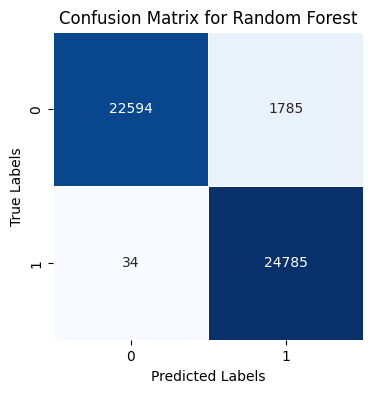

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a colored confusion matrix using seaborn
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

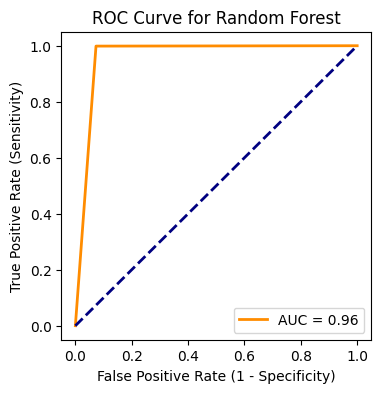

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

Feature Importance using Random Forest

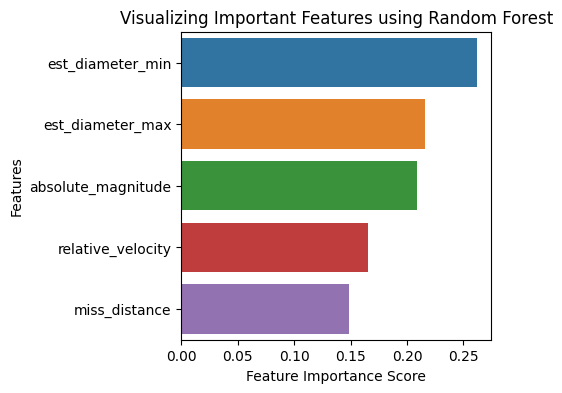

In [ ]:
feature_scores = pd.Series(rf_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features using Random Forest")

# Visualize the graph
plt.show()

4th method
